# Gradient Descent Linear Regression

***
### `class GradientDescentLinearRegression(iterationCount: 1000, learningRate: 0.001, fitIntercept: true)`
***

## Parameters:
  #### `iterationCount`: *Int, optional, default `1000`*
  The maximum number of passes over the training data.
  #### `learningRate`: *Float, optional, default `0.001`*
  The amount that the weights are updated during training.
  #### `fitIntercept`: *Bool, optional, default `true`*
  Whether to calculate the intercept for this model. If set to `false`, no intercept will be used in calculations.

## Attributes: 
  #### `weights`: *Tensor, shape [feature count, target count]*
  Estimated intercepts and coefficients for the linear regression problem. If `fitIntercept: true` first row in tensor represent intercept and remaining rows represent coefficients, else tensor matrix represent the coefficients for the linear regression.

***

## Methods

***

  ### `fit(data: Tensor, labels: Tensor)`:  Fit a linear model.

  ### parameters:

  #### `data`: *Tensor, shape [sample count, feature count]*
  Training data.
  #### `labels`: *Tensor, shape [sample count, target count]*  
  Target data.

  ***

  ### `prediction(for: Tensor)`: Prediction using a linear model.

  ### parameters:
  #### `for`: *Tensor, shape [sample count, feature count]*
  Sample data.

  ### Returns:
  Returns predicted values.  

  ***
  ### `score(data: Tensor, labels: Tensor)`: Returns the coefficient of determination $R^2$ for the prediction.

  ### parameters:
  #### `data`: *Tensor, shape [sample count, feature count]*
  Test sample data.
  #### `labels`: *Tensor, shape [sample count, target count]*  
  True value for test sample data.

  ### Returns:
  Returns the coefficient of determination $R^2$
  
***

# Example

##  Install the swiftML package that's in the local directory.

In [1]:
%install '.package(path: "/home/param/GSOC19/github/swiftML")' swiftML

Installing packages:
	.package(path: "/home/param/GSOC19/github/swiftML")
		swiftML
With SwiftPM flags: []
Working in: /tmp/tmpfbw501gj/swift-install
Completed resolution in 0.37s
Compile Swift Module 'swiftML' (4 sources)
Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


## Install the swiftML package from GitHub.

In [ ]:
%install '.package(url: "https://github.com/param087/swiftML", from: "0.0.1")' swiftML

## Import Swift packages

In [2]:
import TensorFlow
import swiftML

This example uses the only the first feature of the `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

## Import Python modules

In [3]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

import Python

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")

let datasets = Python.import("sklearn.datasets")

## Load and split dataset

In [4]:
// Load the diabetes dataset
let diabetes = datasets.load_diabetes()

// Use only one feature.
let diabetesData = Tensor<Float>(numpy: np.array(diabetes.data, dtype: np.float32))!
let data = diabetesData.slice(lowerBounds: [0, 2], upperBounds: [diabetesData.shape[0], 3])

// Split the data into training/testing sets.
let trainData = data.slice(lowerBounds: [0, 0], upperBounds: [(data.shape[0] - 20), 1])
let testData = data.slice(lowerBounds: [(data.shape[0] - 20), 0], upperBounds: [data.shape[0], 1])

var labels = Tensor<Float>(numpy: np.array(diabetes.target, dtype: np.float32))!
labels = labels.reshaped(to: [labels.shape[0], 1])

// Split the targets/labels into training/testing sets.
let trainLabels = labels.slice(lowerBounds: [0, 0], upperBounds: [(data.shape[0] - 20), 1])
let testLabels = labels.slice(lowerBounds: [(data.shape[0] - 20), 0], upperBounds: [data.shape[0], 1])


In [6]:
let model = GradientDescentLinearRegression(iterationCount: 100000, learningRate: 0.001)

## Fit a linear model

In [7]:
model.fit(data: trainData, labels: trainLabels)

In [8]:
model.score(data: trainData, labels: trainLabels)

0.33513123


In [9]:
model.score(data: testData, labels: testLabels)

0.47256792


In [10]:
model.weights

[[152.91888],
 [938.20593]]


In [11]:
let predictedTestLabels = model.prediction(for: testData)
let x = testData.makeNumpyArray()
let y = testLabels.makeNumpyArray()
let yPredicted = predictedTestLabels.makeNumpyArray()

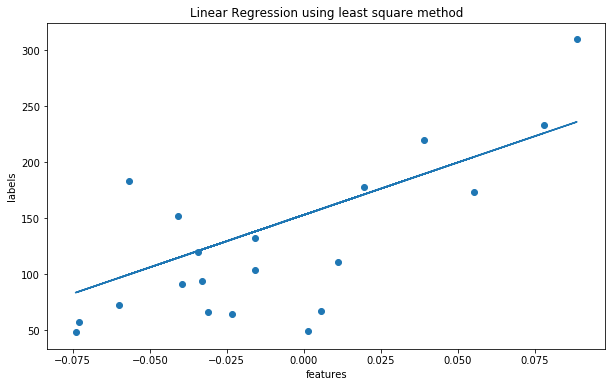

None


In [12]:
plt.figure(figsize: [10, 6])

plt.plot(x, yPredicted)
plt.scatter(x, y)

plt.xlabel("features")
plt.ylabel("labels")
plt.title("Linear Regression using least square method")

plt.show()